# Analysing DDoS Attack Data and Comparison Traffic

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from nfstream import NFStreamer, NFPlugin

#global
attacks_only = ['snmp', 'mssql', 'tftp','netBIOS']
comp_only = ['comparison', 'skypecomparison', 'skype2comparison']
data = attacks_only + comp_only

In [7]:
class TimeDiff(NFPlugin):
    def on_init(self, pkt, flow): # flow creation with the first packet
            if pkt.delta_time < 1:
                flow.udps.low_time_packets = 1
            else:
                flow.udps.low_time_packets = 0
        
    def on_update(self, pkt, flow): # flow update with each packet belonging to the flow
        if pkt.delta_time < 1:
            flow.udps.low_time_packets += 1

            
class PayloadSize(NFPlugin):
    def on_init(self, pkt, flow): # flow creation with the first packet
            if pkt.direction == 0:
                flow.udps.src2dst_size = pkt.payload_size
                flow.udps.dst2src_size = 0
            elif pkt.direction == 1:
                flow.udps.src2dst_size = 0
                flow.udps.dst2src_size = pkt.payload_size
        
    def on_update(self, pkt, flow): # flow update with each packet belonging to the flow
            if pkt.direction == 0:
                flow.udps.src2dst_size += pkt.payload_size
            elif pkt.direction == 1:
                flow.udps.dst2src_size += pkt.payload_size        
                
                
class DeltaTime(NFPlugin):
    def on_init(self, pkt, flow):
        flow.udps.delta_time = [pkt.delta_time]
            
    def on_update(self, pkt, flow):
        pkt_dt_list = [pkt.delta_time]
        flow.udps.delta_time = flow.udps.delta_time + pkt_dt_list
                        
                

In [3]:
# load data
#NetBIOS (SAT-01-12-2018_0475 - SAT-01-12-2018_0485)
for i in range(10):
    a = i + 75
    dat = NFStreamer(source="/home/student/BA/PCAP-01-12/PCAP-01-12_0250-0499/SAT-01-12-2018_04"+str(a)+".pcap",
                             decode_tunnels=True,
                             bpf_filter=None,
                             promiscuous_mode=True,
                             snapshot_length=1536,
                             idle_timeout=120,
                             active_timeout=1800,
                             accounting_mode=0,
                             udps=[TimeDiff(), PayloadSize(), DeltaTime()],
                             n_dissections=20,
                             statistical_analysis=True,
                             splt_analysis=0,
                             n_meters=0,
                             performance_report=0,
                             system_visibility_mode=0,
                             system_visibility_poll_ms=100,
                             system_visibility_extension_port=28314).to_pandas()
    
    if i == 0:
        netBIOS = dat
    
    else:
        netBIOS = pd.concat([netBIOS, dat], ignore_index = True)

        
#SNMP
for i in range(10):    
    
    if i < 10:    
        dat = NFStreamer(source="/home/student/BA/PCAP-01-12/PCAP-01-12_0500-0749/SAT-01-12-2018_050"+str(i)+".pcap",
                                 decode_tunnels=True,
                                 bpf_filter=None,
                                 promiscuous_mode=True,
                                 snapshot_length=1536,
                                 idle_timeout=120,
                                 active_timeout=1800,
                                 accounting_mode=0,
                                 udps=[TimeDiff(), PayloadSize(), DeltaTime()],
                                 n_dissections=20,
                                 statistical_analysis=True,
                                 splt_analysis=0,
                                 n_meters=0,
                                 performance_report=0,
                                 system_visibility_mode=0,
                                 system_visibility_poll_ms=100,
                                 system_visibility_extension_port=28314).to_pandas()
    else:
        dat = NFStreamer(source="/home/student/BA/PCAP-01-12/PCAP-01-12_0500-0749/SAT-01-12-2018_05"+str(i)+".pcap",
                                 decode_tunnels=True,
                                 bpf_filter=None,
                                 promiscuous_mode=True,
                                 snapshot_length=1536,
                                 idle_timeout=120,
                                 active_timeout=1800,
                                 accounting_mode=0,
                                 udps=[TimeDiff(), PayloadSize(), DeltaTime()],
                                 n_dissections=20,
                                 statistical_analysis=True,
                                 splt_analysis=0,
                                 n_meters=0,
                                 performance_report=0,
                                 system_visibility_mode=0,
                                 system_visibility_poll_ms=100,
                                 system_visibility_extension_port=28314).to_pandas()
        
    if i == 0:
        snmp = dat
    
    else:
        snmp = pd.concat([snmp, dat], ignore_index = True) 

        
#TFTP (SAT-01-12-2018_0750 - SAT-01-12-2018_075?)
for i in range(10):    
    dat = NFStreamer(source="/home/student/BA/PCAP-01-12/PCAP-01-12_0750-0818/SAT-01-12-2018_075"+str(i)+".pcap",
                             decode_tunnels=True,
                             bpf_filter=None,
                             promiscuous_mode=True,
                             snapshot_length=1536,
                             idle_timeout=120,
                             active_timeout=1800,
                             accounting_mode=0,
                             udps=[TimeDiff(), PayloadSize(), DeltaTime()],
                             n_dissections=20,
                             statistical_analysis=True,
                             splt_analysis=0,
                             n_meters=0,
                             performance_report=0,
                             system_visibility_mode=0,
                             system_visibility_poll_ms=100,
                             system_visibility_extension_port=28314).to_pandas()
    
    if i == 0:
        tftp = dat
    
    else:
        tftp = pd.concat([tftp, dat], ignore_index = True)

        

# MSSQL (SAT-01-12-2018_0444)
mssql = NFStreamer(source="/home/student/BA/PCAP-01-12/PCAP-01-12_0250-0499/SAT-01-12-2018_0444.pcap",
                         decode_tunnels=True,
                         bpf_filter=None,
                         promiscuous_mode=True,
                         snapshot_length=1536,
                         idle_timeout=120,
                         active_timeout=1800,
                         accounting_mode=0,
                         udps=[TimeDiff(), PayloadSize(), DeltaTime()],
                         n_dissections=20,
                         statistical_analysis=True,
                         splt_analysis=0,
                         n_meters=0,
                         performance_report=0,
                         system_visibility_mode=0,
                         system_visibility_poll_ms=100,
                         system_visibility_extension_port=28314).to_pandas()
        
        
        
#2013-12-17_capture1 
comparison = NFStreamer(source="/home/student/BA/Comparison-Traffic/2013-12-17_capture1.pcap",
                         decode_tunnels=True,
                         bpf_filter=None,
                         promiscuous_mode=True,
                         snapshot_length=1536,
                         idle_timeout=120,
                         active_timeout=1800,
                         accounting_mode=0,
                         udps=[TimeDiff(), PayloadSize(), DeltaTime()],
                         n_dissections=20,
                         statistical_analysis=True,
                         splt_analysis=0,
                         n_meters=0,
                         performance_report=0,
                         system_visibility_mode=0,
                         system_visibility_poll_ms=100,
                         system_visibility_extension_port=28314).to_pandas()        
 
    
skypecomparison = NFStreamer(source="/home/student/BA/Comparison-Traffic/test2.pcap",
                         decode_tunnels=True,
                         bpf_filter=None,
                         promiscuous_mode=True,
                         snapshot_length=1536,
                         idle_timeout=120,
                         active_timeout=1800,
                         accounting_mode=0,
                         udps=[TimeDiff(), PayloadSize(),DeltaTime()],
                         n_dissections=20,
                         statistical_analysis=True,
                         splt_analysis=0,
                         n_meters=0,
                         performance_report=0,
                         system_visibility_mode=0,
                         system_visibility_poll_ms=100,
                         system_visibility_extension_port=28314).to_pandas()

    
skype2comparison = NFStreamer(source="/home/student/BA/Comparison-Traffic/skype2.pcap",
                         decode_tunnels=True,
                         bpf_filter=None,
                         promiscuous_mode=True,
                         snapshot_length=1536,
                         idle_timeout=120,
                         active_timeout=1800,
                         accounting_mode=0,
                         udps=[TimeDiff(), PayloadSize(), DeltaTime()],
                         n_dissections=20,
                         statistical_analysis=True,
                         splt_analysis=0,
                         n_meters=0,
                         performance_report=0,
                         system_visibility_mode=0,
                         system_visibility_poll_ms=100,
                         system_visibility_extension_port=28314).to_pandas()
    
    
    
    

/home/student/.local/lib/python3.10/site-packages/nfstream/streamer.py:495: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(temp_file_path)
/home/student/.local/lib/python3.10/site-packages/nfstream/streamer.py:495: DtypeWarning: Columns (81,82,83,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(temp_file_path)
/home/student/.local/lib/python3.10/site-packages/nfstream/streamer.py:495: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(temp_file_path)
/home/student/.local/lib/python3.10/site-packages/nfstream/streamer.py:495: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(temp_file_path)
/home/student/.local/lib/python3.10/site-packages/nfstream/streamer.py:495: DtypeWarning: Columns (81,82,83

In [8]:
# organising data

for a in data:
    #add new columns with shorter name/in datetime/in seconds
    df = vars()[a]
    df['fs_ms'] = df['src2dst_first_seen_ms']
    df['fs_dt'] = pd.to_datetime(df['fs_ms'], unit = 'ms') - timedelta(hours=4, minutes=0)
    df['fs_dt_s'] = df['fs_dt'].astype('datetime64[s]')
    
    #sort by first_seen
    df.sort_values(by=['fs_ms'], inplace=True)    
    
    #name tables the correct name
    df.columns.name = a
    
    #add timestamp that gives time from first row (normed timestamp for comparison in same plot)
    df['time_norm'] = df.loc[:,'fs_dt'] - df.loc[0]['fs_dt']
    
    vars()[a] = df
    
    
# New Dataframes to store results for different metrics
metrics = ['time_diff_pkt',
           'time_diff_flow',
           'freq_pp', 
           'freq_pf', 
           'freq_pdf',
           'packet_count_pf', 
           'low_delta_time', 
           'aaf']
columns = data
for n in metrics:
    vars()['results_'+n]  = pd.DataFrame(columns = [n] + columns)
    df = vars()['results_'+n]

    df[n] = ['min',
             'max',
             'mean',
             'std_dev']
    df = df.set_index(n)
    vars()['results_'+n] = df

# Calculating Metrics
## 1. Time difference
### a. Time difference per flow

In [9]:
for i in data:
    df = vars()[i]
    #calculate difference
    df['timediff'] = df['fs_ms'].diff()
    vars()[i] = df
    results_time_diff_flow.loc['min'][i] = df['timediff'].min()
    results_time_diff_flow.loc['mean'][i] = df['timediff'].mean()
    results_time_diff_flow.loc['max'][i] = df['timediff'].max()
    results_time_diff_flow.loc['std_dev'][i] = df['timediff'].std()
    
results_time_diff_flow

,snmp,mssql,tftp,netBIOS,comparison,skypecomparison,skype2comparison
time_diff_flow,,,,,,,
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,11.0,2.0,285.0,213.0,14722.0,22061.0,5556.0
mean,0.122806,0.123833,0.050004,0.141525,480.902329,808.388235,456.678161
std_dev,0.340995,0.329474,0.352016,0.381061,1034.445185,2366.161029,1000.716424


/home/student/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


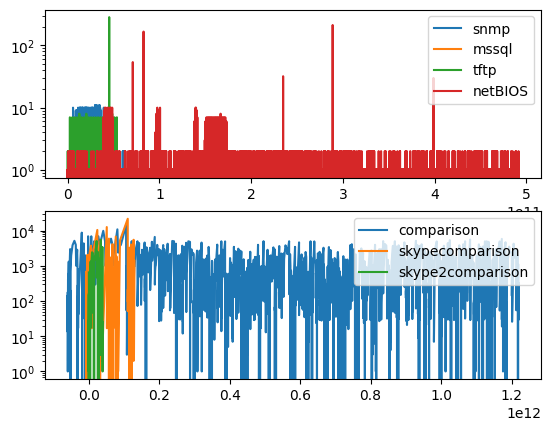

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1)
for i in attacks_only:
    df = vars()[i] 
    ax1.plot(df['time_norm'], df['timediff'], label = i)
    ax1.set_yscale('log')
ax1.legend()
for i in comp_only:
    df = vars()[i] 
    ax2.plot(df['time_norm'], df['timediff'], label = i)
ax2.set_yscale('log')
plt.legend()
plt.show()

### 1b. Time difference per packet

In [11]:
for i in data:
    df = vars()[i]
    vars()[i] = df
    #add lists of delta_time

    alist = df['udps.delta_time'].tolist()
    flat_list = [item for sublist in alist for item in sublist]

    flat_list = [int(x) for x in flat_list if x.lstrip('-').isdigit()]
    df2 = pd.DataFrame(flat_list, columns=['dt'])
    vars()['pkt_dt_'+i] = df2
    
    df = vars()[i]
    results_time_diff_pkt.loc['min'][i] = df2['dt'].min()
    results_time_diff_pkt.loc['mean'][i] = df2['dt'].mean()
    results_time_diff_pkt.loc['max'][i] = df2['dt'].max()
    results_time_diff_pkt.loc['std_dev'][i] = df2['dt'].std()
    
results_time_diff_pkt


,snmp,mssql,tftp,netBIOS,comparison,skypecomparison,skype2comparison
time_diff_pkt,,,,,,,
min,0,0,0,0,0,0,0
max,9,9,9,9,9,9,9
mean,0.00871,0.0129,1.18458,0.016764,1.755786,2.640506,2.489322
std_dev,0.201748,0.260333,2.490309,0.280083,2.565096,2.598634,2.753836


### 1c. packets with delta_time < 1 ms

,snmp,mssql,tftp,netBIOS,comparison,skypecomparison,skype2comparison
low_delta_time,,,,,,,
min,0.111111,0.5,0.2,0.0625,0.002075,0.00627,0.044118
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.998273,0.997379,0.84645,0.996103,0.59256,0.470765,0.515328
std_dev,0.028379,0.035175,0.124718,0.04321,0.234294,0.228087,0.187205


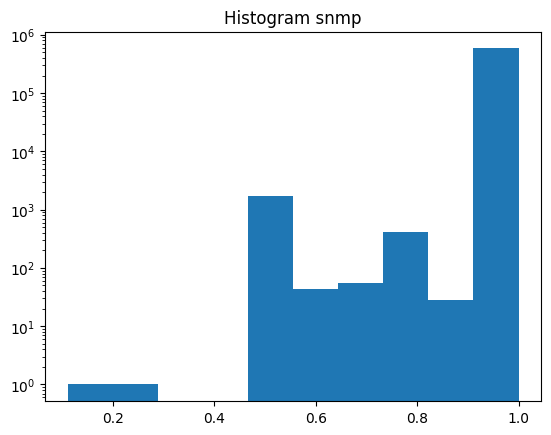

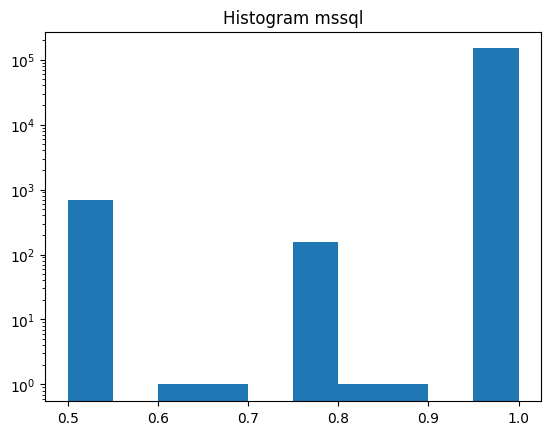

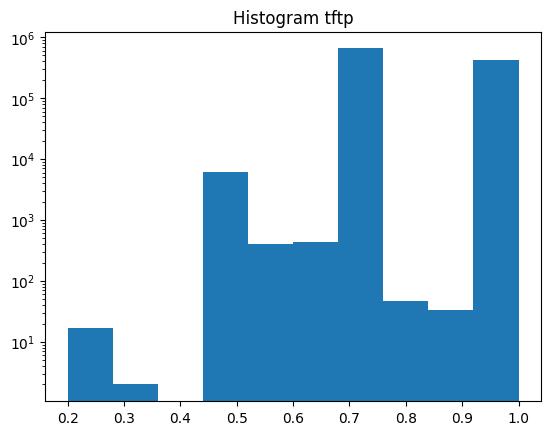

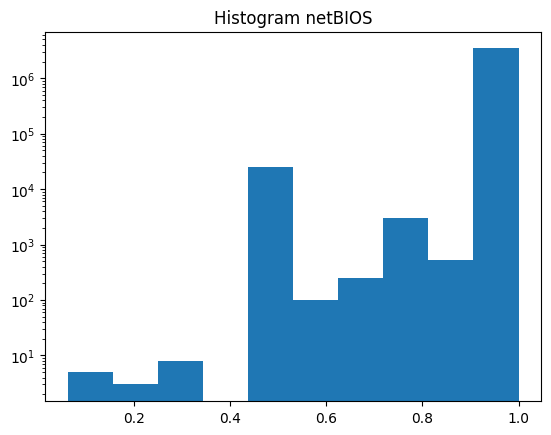

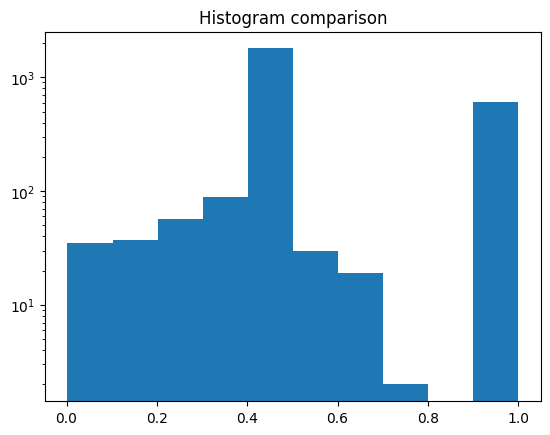

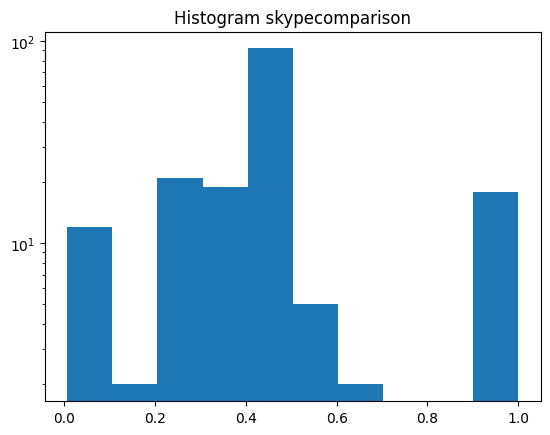

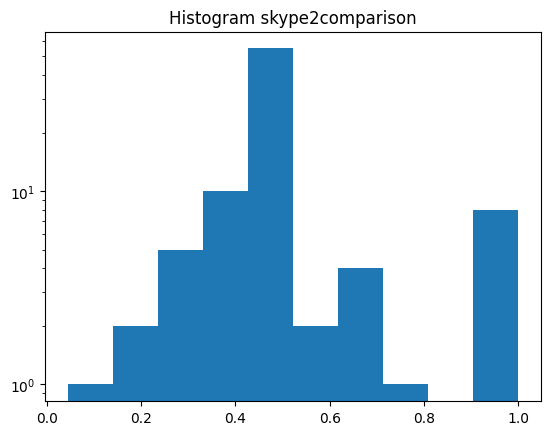

In [14]:
for i in data:
    df = vars()[i]
    
    df['lowtimediffcount/packetcount'] = df['udps.low_time_packets']/df['bidirectional_packets']
    results_low_delta_time[i]['min'] = df['lowtimediffcount/packetcount'].min()
    results_low_delta_time[i]['mean'] = df['lowtimediffcount/packetcount'].mean()
    results_low_delta_time[i]['max'] = df['lowtimediffcount/packetcount'].max()
    results_low_delta_time[i]['std_dev'] = df['lowtimediffcount/packetcount'].std()
    
    #hist
    fig, ax = plt.subplots()
    plt.hist(df['lowtimediffcount/packetcount'])
    ax.set_yscale('log')
    ax.set_title('Histogram '+i)
    #ax.set_yscale('log')
    plt.show

    
    
    vars()[i] = df
results_low_delta_time

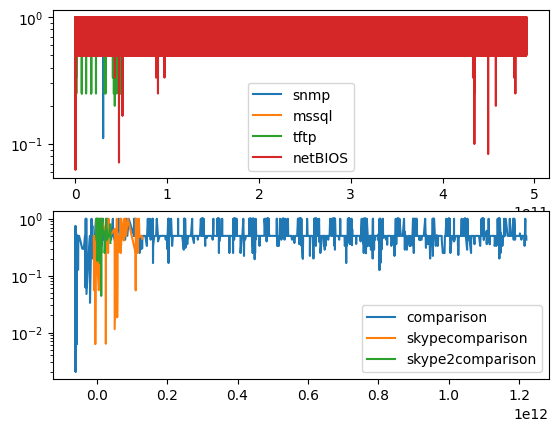

In [13]:
fig, (ax1, ax2) = plt.subplots(2,1)
for i in attacks_only:
    df = vars()[i] 
    ax1.plot(df['time_norm'], df['lowtimediffcount/packetcount'], label = i)
    ax1.set_yscale('log')
ax1.legend()
for i in comp_only:
    df = vars()[i] 
    ax2.plot(df['time_norm'], df['lowtimediffcount/packetcount'], label = i)
    ax2.set_yscale('log')
plt.legend()
plt.show()

## 2. Frequency
### 2a. Frequency per packet

In [15]:
for i in data:
    df = vars()[i]    
    df['timediff_nn'] = df['timediff']
    #df.loc[(df.timediff == 0),'timediff_nn'] = 0.00001
    df['bidir_dur'] = df['bidirectional_duration_ms']
    df.loc[(df.bidirectional_duration_ms == 0), 'bidir_dur'] = 0.001

    df['frequency_nn'] = df['bidirectional_packets']/df['bidir_dur']
    df['frequency'] = df['bidirectional_packets']/df['bidirectional_duration_ms']
    results_freq_pp.loc['min'][i] = df['frequency_nn'].min()
    results_freq_pp.loc['mean'][i] = df['frequency_nn'].mean()
    results_freq_pp.loc['max'][i] = df['frequency_nn'].max()
    results_freq_pp.loc['std_dev'][i] = df['frequency_nn'].std()
    
    vars()[i] = df
    
display(results_freq_pp)

,snmp,mssql,tftp,netBIOS,comparison,skypecomparison,skype2comparison
freq_pp,,,,,,,
min,0.000422,0.000244,0.00075,0.000074,0.000017,0.000039,0.000067
max,6000.0,6000.0,6000.0,24000.0,2000.0,1000.0,1000.0
mean,1992.43252,1988.680047,783.805995,1985.746537,227.95735,105.308529,90.955433
std_dev,127.091629,153.319547,976.784733,214.724791,422.248642,307.777902,289.112516


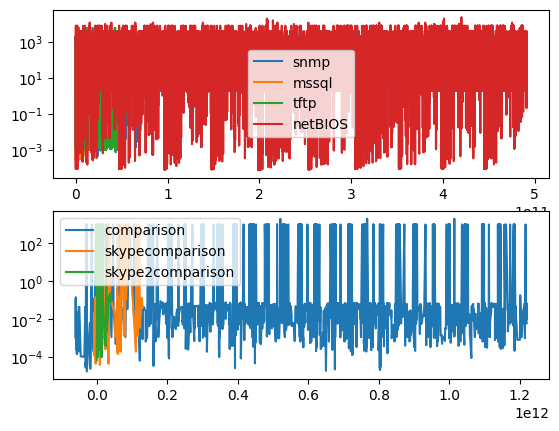

In [17]:
fig, (ax1, ax2) = plt.subplots(2,1)
for i in attacks_only:
    df = vars()[i] 
    ax1.plot(df['time_norm'], df['frequency_nn'], label = i)
    ax1.set_yscale('log')
ax1.legend()
for i in comp_only:
    df = vars()[i] 
    ax2.plot(df['time_norm'], df['frequency_nn'], label = i)
    ax2.set_yscale('log')
plt.legend()
plt.show()

### 2b. Frequency per flow

In [18]:
for i in data:
    df = vars()[i]
    df['bidir_dur'] = df['bidirectional_duration_ms']
    df.loc[(df.bidirectional_duration_ms == 0), 'bidir_dur'] = 0.001
    
    df['freq_pf'] = 1/df['bidir_dur']
    
    results_freq_pf.loc['min'][i] = df['freq_pf'].min()
    results_freq_pf.loc['mean'][i] = df['freq_pf'].mean()
    results_freq_pf.loc['max'][i] = df['freq_pf'].max()
    results_freq_pf.loc['std_dev'][i] = df['freq_pf'].std()
    
    
    vars()[i] = df
    
display(results_freq_pf)

,snmp,mssql,tftp,netBIOS,comparison,skypecomparison,skype2comparison
freq_pf,,,,,,,
min,0.000143,0.000056,0.000175,0.000018,0.000001,0.000007,0.000028
max,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,996.101417,994.229158,391.806666,991.627808,226.821109,105.284259,90.926309
std_dev,62.292027,75.715607,488.152241,91.075167,418.843561,307.786248,289.121775


/home/student/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


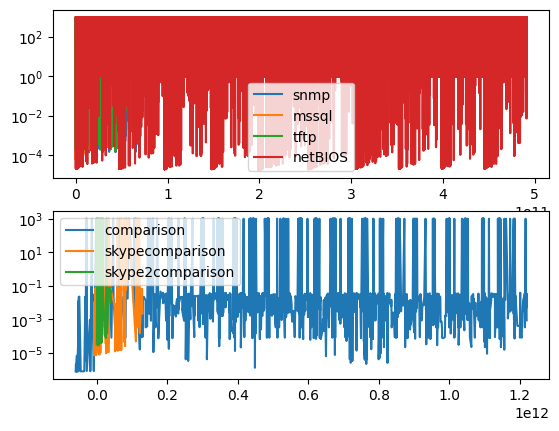

In [19]:
fig, (ax1, ax2) = plt.subplots(2,1)
for i in attacks_only:
    df = vars()[i] 
    ax1.plot(df['time_norm'], df['freq_pf'], label = i)
    ax1.set_yscale('log')
ax1.legend()
for i in comp_only:
    df = vars()[i] 
    ax2.plot(df['time_norm'], df['freq_pf'], label = i)
    ax2.set_yscale('log')
plt.legend()
plt.show()

### 2c. Mean Packet Frequency

In [31]:
results_freq_pdf = pd.DataFrame(columns=data, index = ['mean'])
results_freq_pdf.index.name = 'Mean pkt freq'


for i in data:
    df = vars()[i]
    df['freq_pdf'] = df['bidirectional_packets'].sum()/(df['bidirectional_last_seen_ms'].max()-df['bidirectional_first_seen_ms'].min())
    

    results_freq_pdf.loc['mean'][i] = df['freq_pdf'].mean()

    
    vars()[i] = df
display(results_freq_pdf)

,snmp,mssql,tftp,netBIOS,comparison,skypecomparison,skype2comparison
Mean pkt freq,,,,,,,
mean,16.333533,16.179457,64.401301,14.199128,0.367612,0.095193,0.139792


## Amplification Attack Factor

/home/student/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


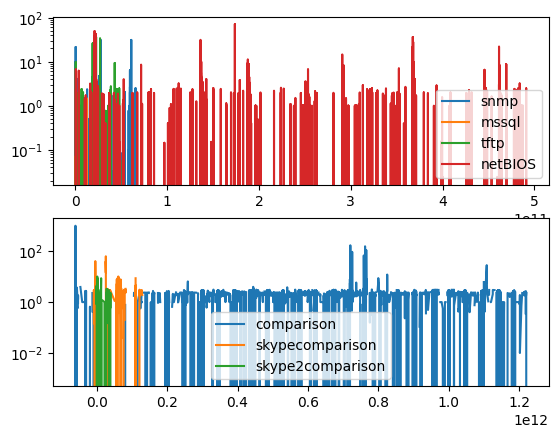

,snmp,mssql,tftp,netBIOS,comparison,skypecomparison,skype2comparison
aaf,,,,,,,
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,31.0,1.740364,36.113322,inf,952.664285,inf,9.936937
mean,0.000613,0.000022,0.000335,inf,2.380391,inf,2.252601
std_dev,0.076589,0.005908,0.0672,NaN,20.128849,NaN,2.018147


In [44]:
for i in data:
    df = vars()[i]
    df['aaf'] = df['udps.dst2src_size']/df['udps.src2dst_size']
    
    results_aaf.loc['min'][i] = df['aaf'].min()
    results_aaf.loc['mean'][i] = df['aaf'].mean()
    results_aaf.loc['max'][i] = df['aaf'].max()
    results_aaf.loc['std_dev'][i] = df['aaf'].std()
    
    vars()[i] = df

    
    #plot    
fig, (ax1, ax2) = plt.subplots(2,1)
for i in attacks_only:
    df = vars()[i] 
    ax1.plot(df['time_norm'], df['aaf'], label = i)
    ax1.set_yscale('log')
ax1.legend()
for i in comp_only:
    df = vars()[i] 
    ax2.plot(df['time_norm'], df['aaf'], label = i)
    ax2.set_yscale('log')
plt.legend()
plt.show()
    
    
    
    
results_aaf

## 4. Entropy per second

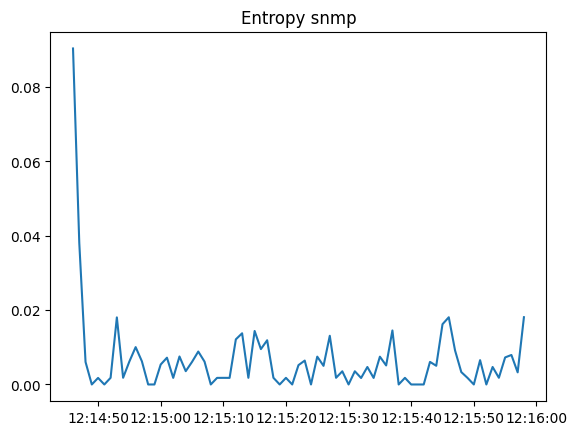

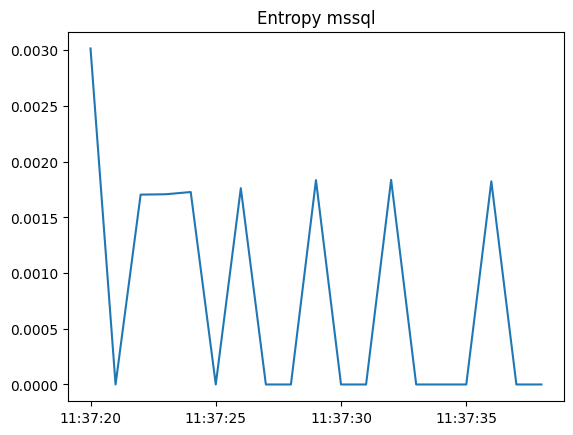

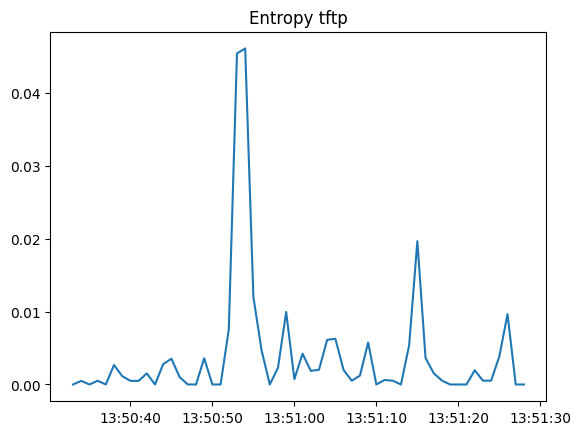

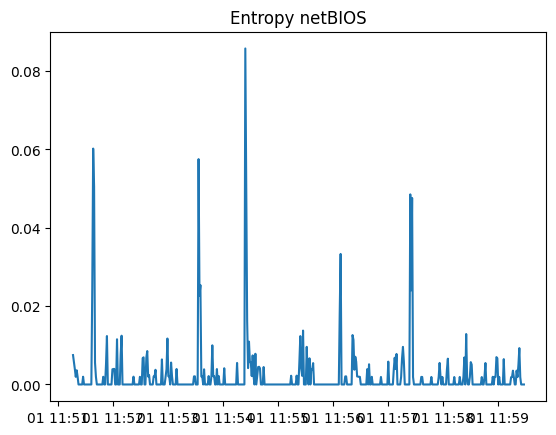

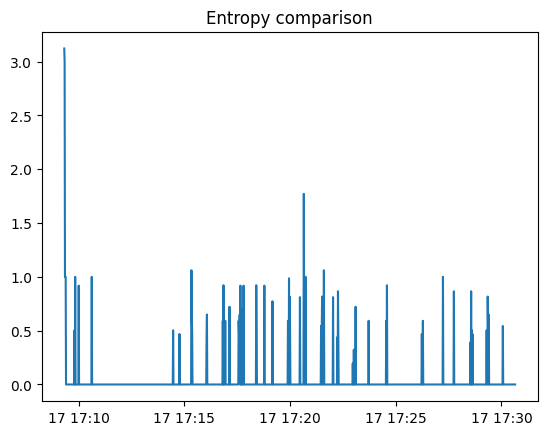

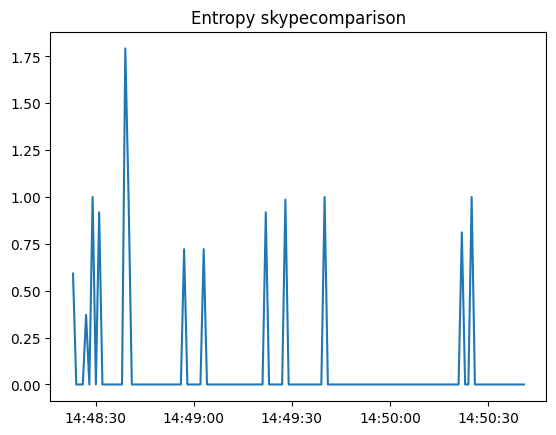

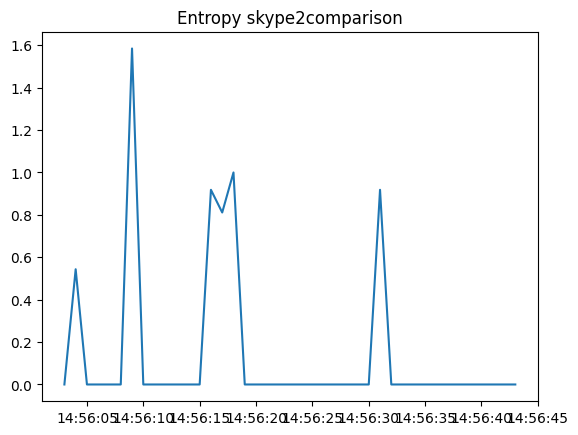

In [37]:
for i in data:
    df = vars()[i]    

    ms_split = {n: g for n, g in df.groupby(pd.Grouper(key='fs_dt_s', freq='1s'))}
    ms_split = {k.to_pydatetime():v for k,v in ms_split.items()}
    
    entropy_time = {}
    for k,v in ms_split.items():
        #group by src_ip and get count
        value, counts = np.unique(v['src_ip'], return_counts = True)
        df1 = pd.DataFrame({'src_ip': value, 'ip_counts': counts})
        #display(df1)

        #calculate entropy
        df1['p_i'] = df1['ip_counts']/df1['ip_counts'].sum()
        entropy = - (df1['p_i'] * np.log2(df1['p_i'])).sum()
        #print(entropy)

        entropy_time[k] = entropy
        #entropy_time['entropy'] = entropy
    #display(entropy_time)
    entropy_time = pd.DataFrame.from_dict(entropy_time, orient='index', columns=['entropy'])
    entropy_time.columns.name = i
    vars()["entropy_time_"+i] = entropy_time
    
     #plot
    fig, ax = plt.subplots()
    ax.plot(vars()["entropy_time_"+i])
    ax.set_title("Entropy "+i)
    #plt.hist(stat)
    plt.show
    
    vars()[i] = df

## 5.  packet count

,snmp,mssql,tftp,netBIOS,comparison,skypecomparison,skype2comparison
packet_count_pf,,,,,,,
min,1,1,1,1,1,1,1
max,199,90,185,510,184518,6265,4775
mean,2.00586,2.003539,3.220306,2.009533,176.957191,78.035088,63.295455
std_dev,0.454566,0.313122,1.054226,0.723176,4831.180902,574.254318,508.48832


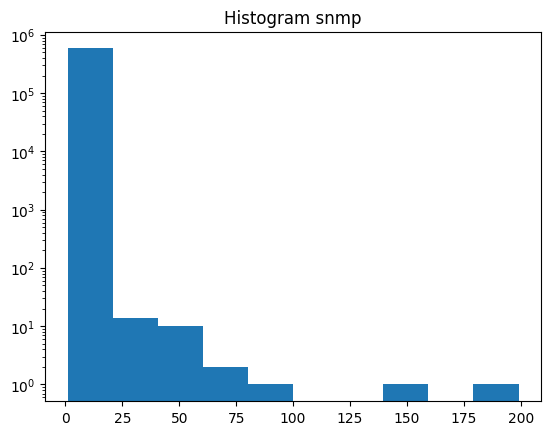

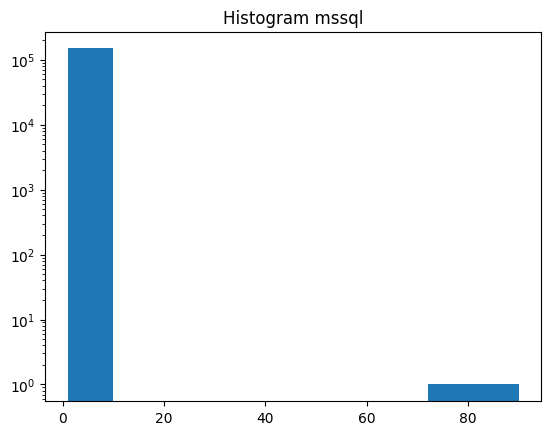

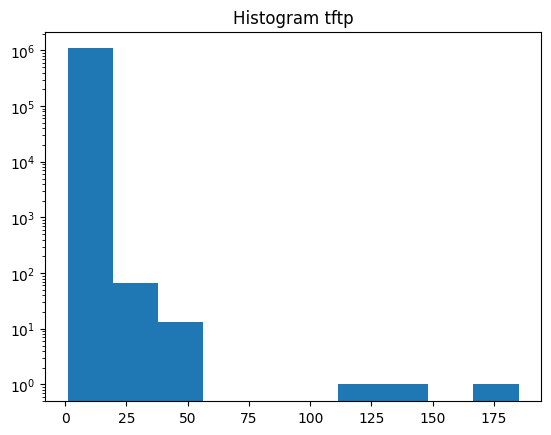

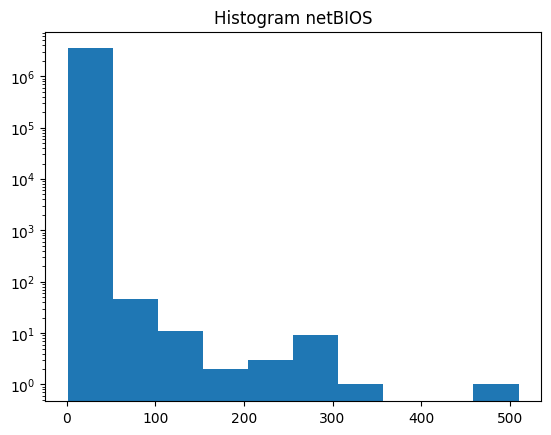

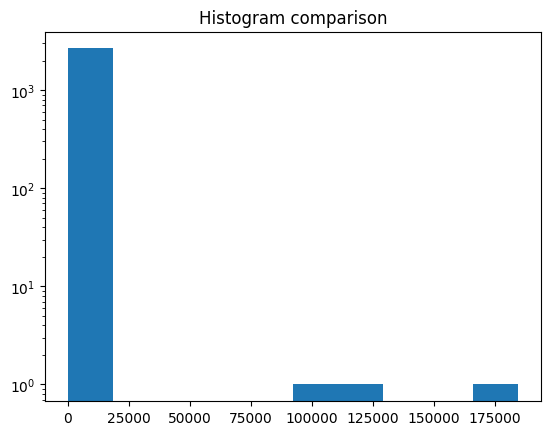

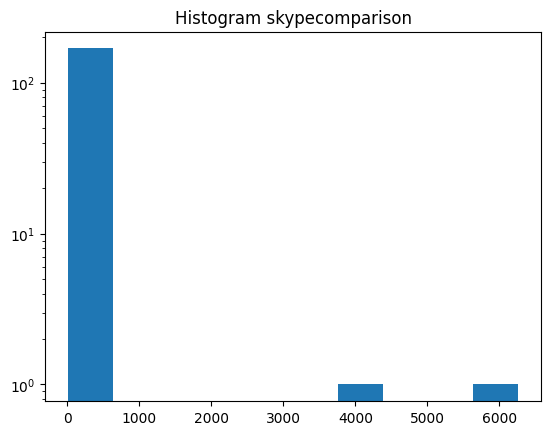

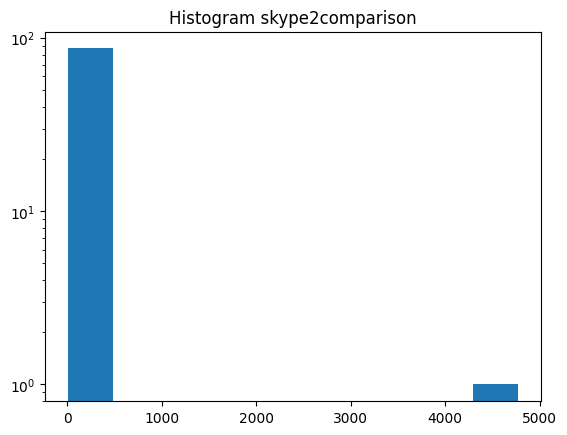

In [39]:
for i in data:
    df = vars()[i]
    results_packet_count_pf.loc['min'][i] = df['bidirectional_packets'].min()
    results_packet_count_pf.loc['mean'][i] = df['bidirectional_packets'].mean()
    results_packet_count_pf.loc['max'][i] = df['bidirectional_packets'].max()
    results_packet_count_pf.loc['std_dev'][i] = df['bidirectional_packets'].std()
    
     #hist
    fig, ax = plt.subplots()
    plt.hist(df['bidirectional_packets'])
    ax.set_title('Histogram '+i)
    ax.set_yscale('log')
    plt.show
   
    
    vars()[i] = df
results_packet_count_pf

/home/student/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


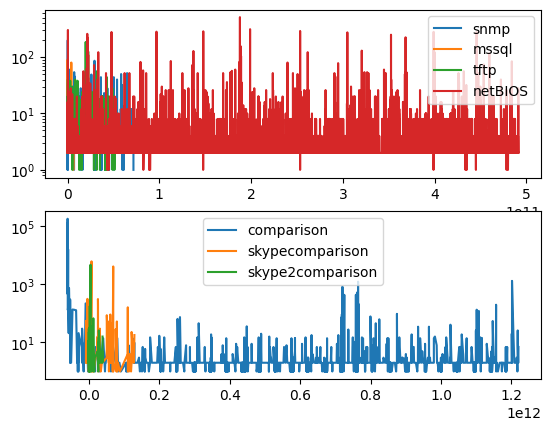

In [41]:


fig, (ax1, ax2) = plt.subplots(2,1)
for i in attacks_only:
    df = vars()[i] 
    ax1.plot(df['time_norm'], df['bidirectional_packets'], label = i)
    ax1.set_yscale('log')
ax1.legend()
for i in comp_only:
    df = vars()[i] 
    ax2.plot(df['time_norm'], df['bidirectional_packets'], label = i)
    ax2.set_yscale('log')
plt.legend()
plt.show()  
    
    